In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from xgboost import XGBClassifier

## Preprocessing

In [2]:
raw_data = pd.read_csv(os.path.join('..','..','data','raw','FraudDataset2.csv'))
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data = raw_data.copy(deep=True)

<Axes: xlabel='Amount', ylabel='Count'>

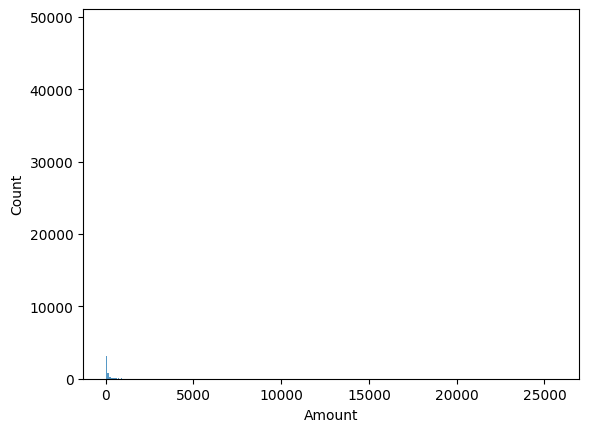

In [5]:
sns.histplot(data['Amount'])

In [6]:
data['Amount'] = np.log1p(data['Amount'])

<Axes: xlabel='Amount', ylabel='Count'>

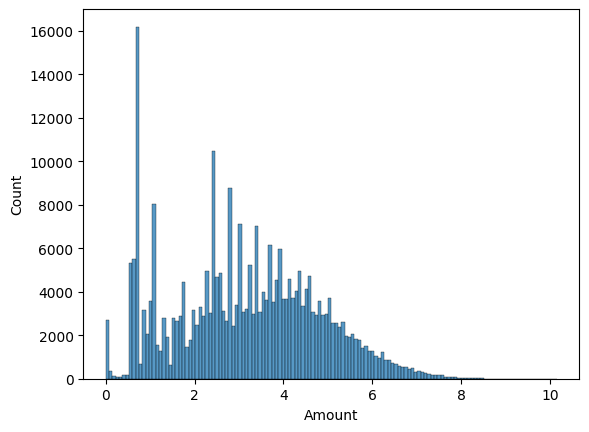

In [7]:
sns.histplot(data['Amount'])

## Feature engineering

In [9]:
output_feature = pd.DataFrame(data[['Class']])
input_features = data.drop(columns=['Class'])

### Split dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(input_features, output_feature, test_size=0.2, random_state=42)

## Modelling
- Non-sequential modelling (Does not take context into account, only infer from given input)
- Sequential modelling (Takes context into account, infer from given input and past related data)

In [12]:
SEED = 42

np.random.seed(SEED)

### Non-sequential models

- Logistic Regression
- Decision Tree
- Random Forest
- Stochastic Gradient Descent Classifier
- XGBoost

In [15]:
model_lr = LogisticRegression(random_state=SEED, max_iter=1000)

model_lr.fit(x_train, y_train)

model_lr.score(x_test, y_test)

c:\Users\BAOHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\BAOHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991046662687406

In [13]:
model_dtree = DecisionTreeClassifier(random_state=SEED)

model_dtree.fit(x_train, y_train)

model_dtree.score(x_test, y_test)

0.9990519995786665

In [16]:
model_rf = RandomForestClassifier(random_state=SEED,
                                  n_estimators=100,
                                  max_depth=10)

model_rf.fit(x_train, y_train)

model_rf.score(x_test, y_test)

c:\Users\BAOHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9995084442259752

In [17]:
model_sgd = SGDClassifier(random_state=SEED)

model_sgd.fit(x_train, y_train)

model_sgd.score(x_test, y_test)

c:\Users\BAOHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9982268881008391

In [18]:
model_xgb = XGBClassifier(random_state=SEED)

model_xgb.fit(x_train, y_train)

model_xgb.score(x_test, y_test)

0.9995611109160493